In [1]:
pip install --upgrade yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TSLA.csv", parse_dates=["Date"])

print(df.head())

print(df.isnull().sum())


        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


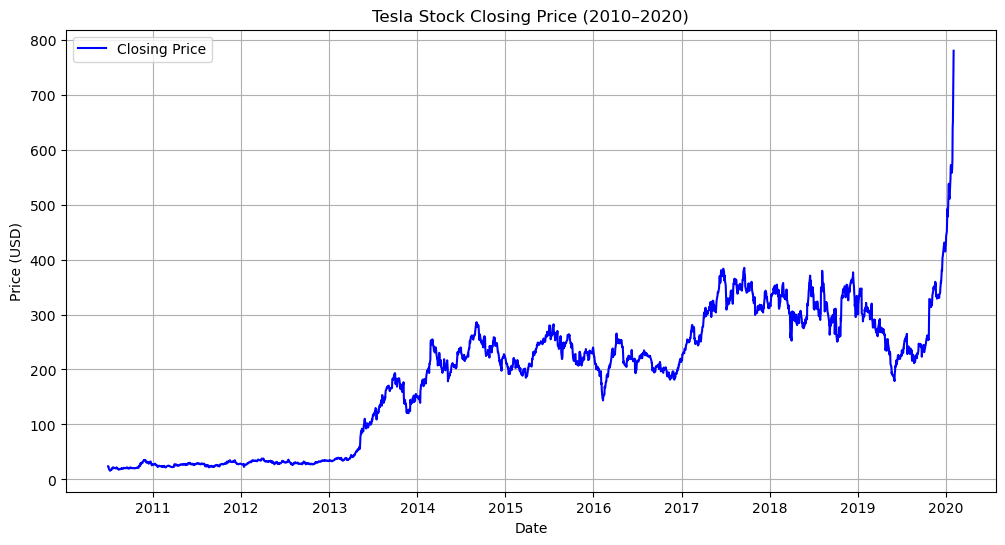

In [3]:
df.set_index("Date", inplace=True)

# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Closing Price", color='blue')
plt.title("Tesla Stock Closing Price (2010–2020)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


In [4]:
#Clean Data
# Drop rows with missing values 
df.dropna(inplace=True)

print(df.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

ts = df['Close']

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")


Train size: 1932
Test size: 484


In [7]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))



C:\Users\NEHA KL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NEHA KL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NEHA KL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NEHA KL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

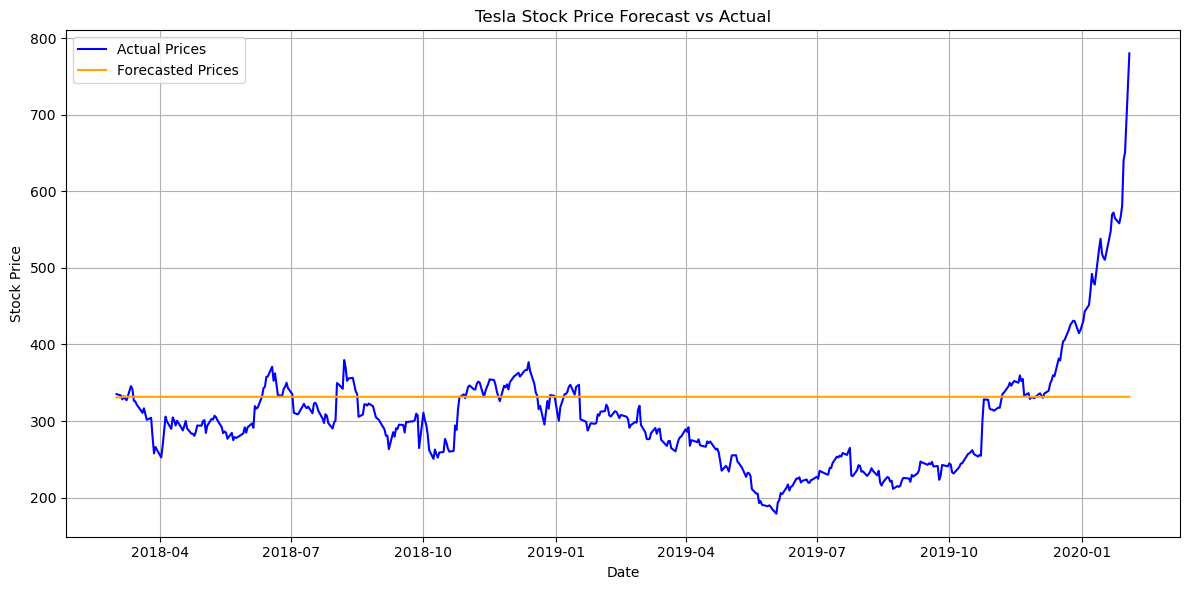

In [9]:
import matplotlib.pyplot as plt

# Make sure test and forecast are the same length
test = test[:len(forecast)]

plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Prices', color='blue')
plt.plot(test.index, forecast.values, label='Forecasted Prices', color='orange')
plt.title('Tesla Stock Price Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
print(test.isnull().sum(), forecast.isnull().sum())


0 0


In [11]:
print(train.isnull().sum()) 


0


In [12]:
forecast = forecast.dropna()
test = test[:len(forecast)]  # match sizes again


In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 5979.66
